In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_frt = pd.read_excel('http://api.worldbank.org/v2/en/indicator/AG.LND.FRST.K2?downloadformat=excel', skiprows=range(3))
#df_frt

In [3]:
df_frt = df_frt.drop(['Country Code','Indicator Name','Indicator Code','2017','2018','2019'], axis=1)
#df_frt

In [4]:
df_frt = df_frt.drop(df_frt.loc[:,'1960':'1989'].columns, axis=1)
#df_frt

In [5]:
df_frt = df_frt.fillna(0)

In [6]:
df_frt = df_frt.rename(columns={'Country Name':'Country'})
#df_frt

In [7]:
df_frt = df_frt.set_index('Country')

In [8]:
df_frt = df_frt.drop(['Arab World','Central Europe and the Baltics','East Asia & Pacific (excluding high income)',
             'Early-demographic dividend','East Asia & Pacific','Europe & Central Asia (excluding high income)',
             'Europe & Central Asia','Euro area','European Union','Fragile and conflict affected situations','High income',
             'Heavily indebted poor countries (HIPC)','IBRD only','IDA & IBRD total','IDA total','IDA blend','IDA only',
             'Latin America & Caribbean (excluding high income)','Lao PDR','Latin America & Caribbean',
             'Least developed countries: UN classification','Low income','Lower middle income','Low & middle income',
             'Late-demographic dividend','Middle East & North Africa','Middle income','Middle East & North Africa (excluding high income)',
             'OECD members','Other small states','Pre-demographic dividend','West Bank and Gaza','Pacific island small states',
             'Post-demographic dividend','South Asia','Sub-Saharan Africa (excluding high income)','Small states',
             'Turks and Caicos Islands','East Asia & Pacific (IDA & IBRD countries)','Europe & Central Asia (IDA & IBRD countries)',
             'Latin America & the Caribbean (IDA & IBRD countries)','Middle East & North Africa (IDA & IBRD countries)',
             'South Asia (IDA & IBRD)','Sub-Saharan Africa (IDA & IBRD countries)','Upper middle income','World','North America','Sub-Saharan Africa'], 
            axis=0)

In [9]:
df_frt.shape

(216, 27)

In [10]:
df_frt.columns=list(map(str,df_frt.columns))
years=list(map(str,range(1990,2016)))

In [11]:
df_frt['Total'] = df_frt.sum(axis=1)
df_frt

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,...,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.2,4.200000,1.134000e+02
Afghanistan,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,...,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.0,13500.000000,3.645000e+05
Angola,609760.000000,608511.992188,607263.984375,606016.015625,604768.007812,603520.000000,602271.992188,601023.984375,599776.015625,598528.007812,...,587296.015625,586048.007812,584800.000000,583551.992188,582303.984375,581056.015625,579808.007812,578560.0,577311.992188,1.602547e+07
Albania,7887.999878,7868.499756,7849.000244,7829.500122,7810.000000,7790.499878,7770.999756,7751.500244,7732.000122,7712.500000,...,7787.399902,7775.200195,7762.999878,7753.400269,7743.800049,7734.199829,7724.600220,7715.0,7705.399780,2.098669e+05
Andorra,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0,160.000000,4.320000e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00
"Yemen, Rep.",5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,...,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.0,5490.000000,1.482300e+05
South Africa,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,...,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.0,92410.000000,2.495070e+06


In [12]:
mpl.style.use('ggplot')

In [13]:
df_frt2 = df_frt.sort_values(by='2016', ascending=False)
df_frt_top5 = df_frt2.head(5)
df_frt_top5 = df_frt_top5['2016'].transpose()
df_frt_top5

Country
Russian Federation    8.148895e+06
Brazil                4.925540e+06
Canada                3.470224e+06
United States         3.103700e+06
China                 2.098635e+06
Name: 2016, dtype: float64

In [14]:
df_frt_russ = df_frt.loc[['Russian Federation'], years].transpose()
#df_frt_russ.head()

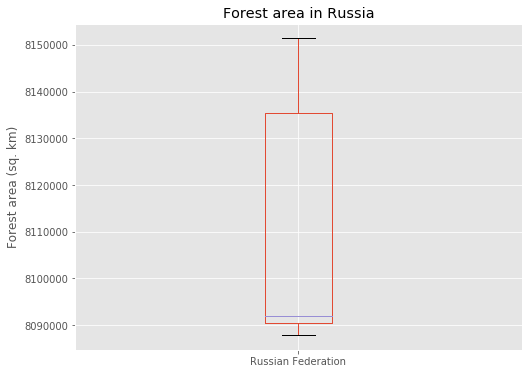

In [15]:
df_frt_russ.plot(kind='box', figsize=(8, 6))

plt.title('Forest area in Russia')
plt.ylabel('Forest area (sq. km)')

plt.show()

In [16]:
df_frt_rb = df_frt.loc[['Russian Federation','Brazil'],years].transpose()
df_frt_rb.head()

Country,Russian Federation,Brazil
1990,8089500.000,5467050.000
1991,8089500.000,5441618.750
1992,8090136.250,5416188.125
1993,8090455.000,5390756.875
1994,8090773.125,5365326.250


<function matplotlib.pyplot.show(*args, **kw)>

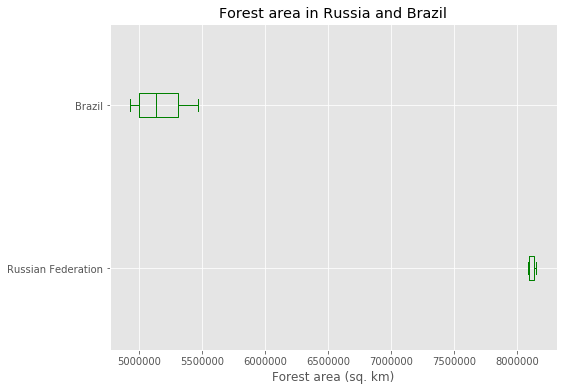

In [17]:
df_frt_rb.plot(kind='box', figsize=(8,6), color='green', vert=False )

plt.title('Forest area in Russia and Brazil')
plt.xlabel('Forest area (sq. km)')

plt.show

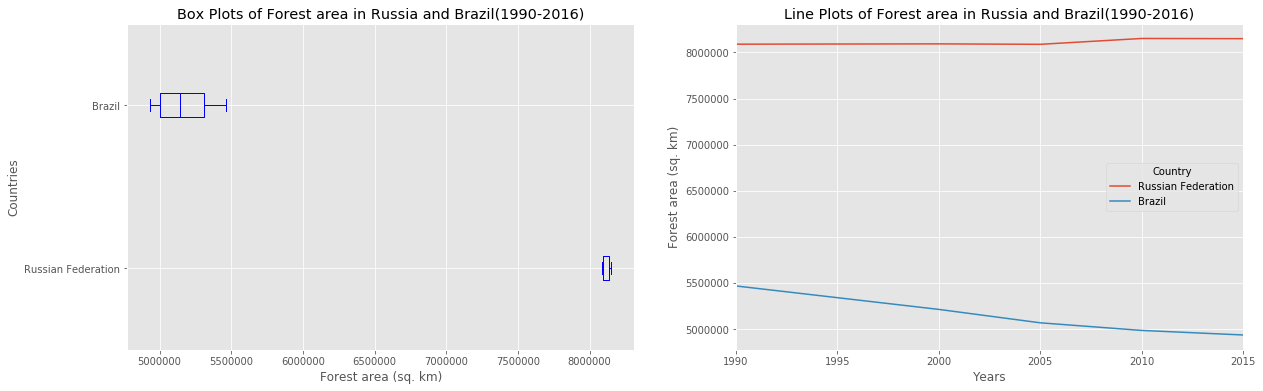

In [18]:
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

df_frt_rb.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0)
ax0.set_title('Box Plots of Forest area in Russia and Brazil(1990-2016)')
ax0.set_xlabel('Forest area (sq. km)')
ax0.set_ylabel('Countries')

df_frt_rb.plot(kind='line', figsize=(20, 6), ax=ax1)
ax1.set_title ('Line Plots of Forest area in Russia and Brazil(1990-2016)')
ax1.set_ylabel('Forest area (sq. km)')
ax1.set_xlabel('Years')

plt.show()